In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from numpy import linalg as LA

%matplotlib inline

In [2]:
my_data = pd.read_csv('/home/lin/教材/MearchineLearning/assignmentOneData/48EqualWeighted.csv')

my_data['Unnamed: 0'] = pd.to_datetime(my_data['Unnamed: 0'])

print( np.unique(my_data['Unnamed: 0']).shape, my_data['Unnamed: 0'].shape)

my_data.set_index('Unnamed: 0', inplace = True)
N_ASSET = my_data.shape[1]

(12196,) (12196,)


### for features I will use mean-var, correlations. Theoretically, I can use 12K returns as 12K features for each asset, however, it is a extreme high dimentional problem, and even if you get the results, it is gonna be super difficult to interperate

In [16]:
def get_feature_Matrices(data):
    meanVar = pd.DataFrame(columns=['mean', 'var'], index=data.columns, dtype=float)
    MI = pd.DataFrame(index=data.columns, columns=data.columns, dtype=float)

    for col in data.columns:
        meanVar['mean'][col] = data[col].mean()
        meanVar['var'][col] = data[col].var()
        for ref_col in data.columns:
            MI[ref_col][col] = metrics.mutual_info_score(data[ref_col], data[col])

    pearson = data.corr()
    kendall = data.corr(method='kendall')
    spearman = data.corr(method='spearman')
    
    return meanVar, pearson, kendall, spearman, MI


In [309]:
MV, corr, Ken, Spe, MI = get_feature_Matrices(my_data)

In [81]:
def choose_K(featureMa, plot=True, labelS=22, tS=22):
    
    sumDis = pd.DataFrame(columns=['sumDisSq', 'bm'], index=range(1, 49), dtype=float)
    bm = np.random.rand(featureMa.shape[0], featureMa.shape[1])
    for i in range(1, 49):

        kmeans = KMeans(n_clusters=i).fit(featureMa)
        sumDis['sumDisSq'][i] = kmeans.inertia_ 
        kmeansBM = KMeans(n_clusters=i).fit(bm)
        sumDis['bm'][i] = kmeansBM.inertia_ 
    print(abs(sumDis.diff()[abs(sumDis.diff()['sumDisSq']) > abs(sumDis.diff()['bm'])]))
    if plot:
        plt.plot(abs(sumDis.diff()), '-2')
        plt.legend(['data', 'benchmark'], fontsize=labelS)
        plt.xlabel('K', fontsize=labelS)
        plt.ylabel(r'absolute reduction in $\sum_{a=1}^{K} W(C_{a})$', fontsize=labelS)
        plt.title('K values vs reduction in loss function', fontsize=tS)
    return sumDis

Document of K-means  http://scikit-learn.org/stable/modules/clustering.html#k-means

Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='k-means++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference.

n_init = 10

Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

    sumDisSq        bm
2  74.331068  3.367174
3  22.354404  1.551650
4   9.365710  1.115189
5   1.106531  1.045215


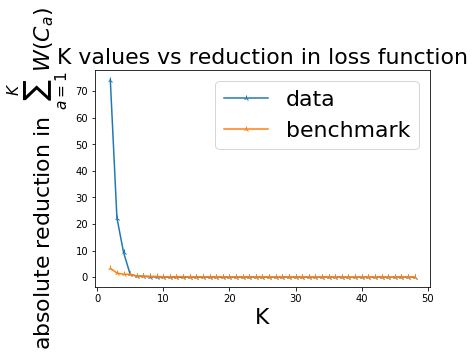

In [82]:
MVsumDis = choose_K(MV)

0
Index(['Agric', 'Smoke', 'Cnstr', 'FabPr', 'Ships', 'Guns', 'Mines', 'Oil'], dtype='object')
1
Index(['Food', 'Beer', 'Toys', 'Fun', 'Books', 'Hshld', 'Clths', 'MedEq',
       'Chems', 'Rubbr', 'Txtls', 'BldMt', 'Mach', 'ElcEq', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'LabEq', 'Paper', 'Trans', 'Whlsl', 'Rtail', 'Meals',
       'Banks', 'Insur', 'Fin', 'Other'],
      dtype='object')
2
Index(['Gold', 'Coal'], dtype='object')
3
Index(['Soda', 'Hlth', 'Drugs', 'Steel', 'Autos', 'Aero', 'Comps', 'Chips',
       'Boxes', 'RlEst'],
      dtype='object')


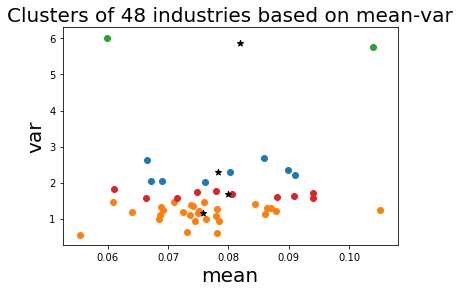

In [132]:
MVChoise = 4
kmeans = KMeans(MVChoise).fit(MV)
MV['cluster'] = kmeans.labels_ 
for j in range(MVChoise):
    print(j)
    print(MV[MV['cluster']==j].index)
    plt.scatter(MV['mean'][MV['cluster'] == j], MV['var'][MV['cluster'] == j])
    plt.scatter(kmeans.cluster_centers_[j][0], kmeans.cluster_centers_[j][1], marker='*', s=40, c='k')
    plt.xlabel('mean', fontsize=20)
    plt.ylabel('var', fontsize=20)
    plt.title('Clusters of 48 industries based on mean-var', fontsize=20)


    sumDisSq         bm
2  29.214085  10.066684
3   8.203701   7.674182
0
Index(['Food', 'Fun', 'Books', 'Hshld', 'Clths', 'MedEq', 'Drugs', 'Chems',
       'BldMt', 'Cnstr', 'Steel', 'Mach', 'ElcEq', 'Autos', 'Telcm', 'BusSv',
       'Comps', 'Chips', 'LabEq', 'Paper', 'Trans', 'Whlsl', 'Rtail', 'Meals',
       'Banks', 'Insur', 'Fin'],
      dtype='object')
1
Index(['Agric', 'Soda', 'Beer', 'Smoke', 'Toys', 'Hlth', 'Rubbr', 'Txtls',
       'FabPr', 'Aero', 'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil',
       'Util', 'PerSv', 'Boxes', 'RlEst', 'Other'],
      dtype='object')


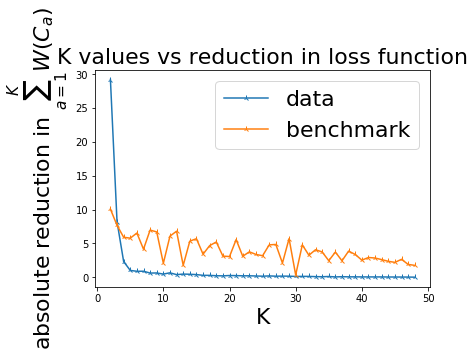

In [88]:
PearsonSumDis = choose_K(corr)
choise = 2
kmeans = KMeans(choise).fit(corr)
corr['cluster'] = kmeans.labels_ 
for j in range(choise):
    print(j)
    print(corr[corr['cluster']==j].index)

Empty DataFrame
Columns: [sumDisSq, bm]
Index: []
0
Index(['Food', 'Toys', 'Fun', 'Books', 'Hshld', 'Clths', 'Hlth', 'MedEq',
       'Drugs', 'Chems', 'Rubbr', 'Txtls', 'BldMt', 'Cnstr', 'Steel', 'Mach',
       'ElcEq', 'Autos', 'Aero', 'Oil', 'Util', 'Telcm', 'PerSv', 'BusSv',
       'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans', 'Whlsl', 'Rtail',
       'Meals', 'Banks', 'Insur', 'Fin', 'Other'],
      dtype='object')
1
Index(['Agric', 'Soda', 'Beer', 'Smoke', 'FabPr', 'Ships', 'Guns', 'Gold',
       'Mines', 'Coal', 'RlEst'],
      dtype='object')


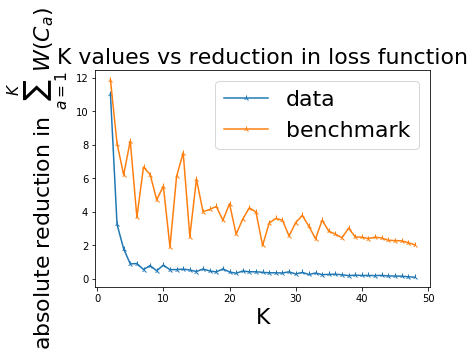

In [89]:
KenSumDis = choose_K(Ken)
choise = 2
kmeans = KMeans(choise).fit(Ken)
Ken['cluster'] = kmeans.labels_ 
for j in range(choise):
    print(j)
    print(Ken[Ken['cluster']==j].index)

    sumDisSq         bm
2  16.644168  10.459957
0
Index(['Agric', 'Soda', 'Beer', 'Smoke', 'FabPr', 'Ships', 'Guns', 'Gold',
       'Mines', 'Coal', 'RlEst'],
      dtype='object')
1
Index(['Food', 'Toys', 'Fun', 'Books', 'Hshld', 'Clths', 'Hlth', 'MedEq',
       'Drugs', 'Chems', 'Rubbr', 'Txtls', 'BldMt', 'Cnstr', 'Steel', 'Mach',
       'ElcEq', 'Autos', 'Aero', 'Oil', 'Util', 'Telcm', 'PerSv', 'BusSv',
       'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans', 'Whlsl', 'Rtail',
       'Meals', 'Banks', 'Insur', 'Fin', 'Other'],
      dtype='object')


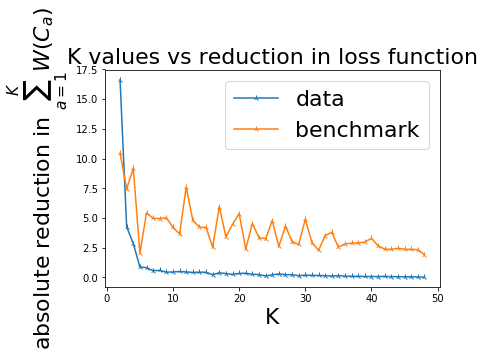

In [90]:
SpeSumDis = choose_K(Spe)
choise = 2
kmeans = KMeans(choise).fit(Spe)
Spe['cluster'] = kmeans.labels_ 
for j in range(choise):
    print(j)
    print(Spe[Spe['cluster']==j].index)

     sumDisSq         bm
2   54.543151  11.100169
3   32.650452   7.131909
4   23.063912   7.438081
5   12.956811   5.853016
6   12.611971   4.547055
7   14.860091   7.055450
8   10.852100   5.094722
9   12.761356   7.659117
10  11.842264   3.284055
11  11.678628   4.559783
12  12.064693   7.334093
13  11.804866   3.566709
14  11.130812   4.070580
15  11.723546   5.683792
16  10.678823   3.293988
17  12.041817   2.836235
18  11.137922   6.850620
19  11.459291   2.681554
20  11.465001   2.557674
21  11.277681   3.899053
22  10.462253   2.711738
23  11.872229   5.120644
24  10.540847   4.355337
25  10.740694   2.525980
26  10.552262   4.309269
27  11.804631   2.729312
28  10.588081   3.532757
29  10.543367   1.899052
30  10.554031   4.112166
31  11.048259   4.785765
32  10.815023   1.428166
33  10.432478   4.247797
34  10.619193   3.548452
35  10.713974   2.541671
36  10.531381   1.928105
37  10.227494   5.589919
38  10.354667   0.088485
39  10.535166   3.741653
40  10.181774   2.866401


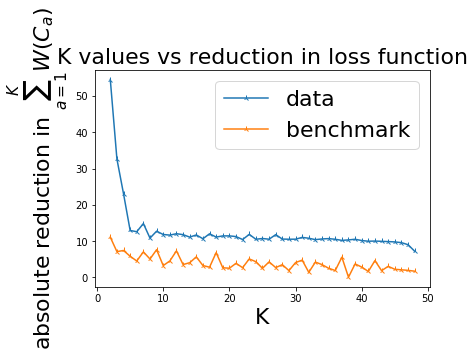

In [91]:
MISumDis = choose_K(MI)
choise = 2
kmeans = KMeans(choise).fit(MI)
MI['cluster'] = kmeans.labels_ 
for j in range(choise):
    print(j)
    print(MI[MI['cluster']==j].index)

In [250]:
def hard_core_W(featureMa):
    
    newGroup = featureMa.groupby(by='cluster')
    DifW = 0.0
    for key, item in newGroup:
        oneClus = pd.DataFrame(newGroup.get_group(key), dtype=float).drop('cluster', axis=1)
        sumD = 0.0
        for asset1 in oneClus.index:
            vec1 = oneClus[oneClus.index==asset1]
            for asset2 in oneClus.index:
                vec2 = oneClus[oneClus.index==asset2]
                norm = LA.norm(np.asarray(vec1) - np.asarray(vec2))**2
                sumD = sumD + norm
        intoW = sumD/(oneClus.shape[0] * 2)
        DifW = DifW + intoW
    print(DifW)
#These two are the same thing, notes page 9


In [303]:
def gap_choose(featureMa, B=10):
    sumDis = pd.DataFrame(columns=['sumDisSq', 'bm', 'Elogbm', 'stBm', 'Gapk', 'sk'], index=range(1, 48), dtype=float)
    for i in range(1, 48):
        kmeans = KMeans(n_clusters=i).fit(featureMa)
        sumDis['sumDisSq'][i] = np.log(kmeans.inertia_)
        Wseries = pd.DataFrame(columns=['Wref'], index=range(B), dtype=float)

        for j in range(B):
            bm = pd.DataFrame(columns=featureMa.columns, index=featureMa.index, dtype=float)
            for col in featureMa.columns:
                up = max(featureMa[col])
                down = min(featureMa[col])
                ran = up - down
                bm[col] = np.random.rand(len(featureMa[col])) * ran + down
                
            kmeansBM = KMeans(n_clusters=i).fit(bm)
            Wseries['Wref'][j] = kmeansBM.inertia_
        sumDis['Elogbm'][i] = np.mean(np.log(Wseries['Wref']))
        sumDis['bm'][i] = np.mean(Wseries['Wref'])
        sumDis['stBm'][i] = np.std(np.log(Wseries['Wref']))

    sumDis['Gapk'] = sumDis['Elogbm'] - sumDis['sumDisSq']
    sumDis['sk'] = sumDis['stBm'] * (1 + 1 / B) ** 0.5
    sumDis['tocompare'] = (sumDis['Gapk'] - sumDis['sk']).shift(-1)
    return sumDis

In [314]:
def present_K_choice(sumMa, labelS=22, tS=22):
    plt.figure()
    plt.plot(np.exp(sumMa['sumDisSq']), '-2r')
    plt.plot(sumMa['bm'], '-2b')
    plt.legend(['data', 'benchmark'], fontsize=labelS)
    plt.xlabel('K', fontsize=labelS)
    plt.ylabel(r'$\sum_{a=1}^{K} W(C_{a})$', fontsize=labelS)
    plt.title('K values vs within sum of squares', fontsize=tS)
    
    plt.figure()
    plt.plot(sumMa['sumDisSq'], '-or')
    plt.plot(sumMa['Elogbm'], '-xb')
    plt.legend(['data', 'benchmark'], fontsize=labelS)
    plt.xlabel('K', fontsize=labelS)
    plt.ylabel(r'$logW_{k}$', fontsize=labelS)
    plt.title(r'K values vs $logW_{k}$', fontsize=tS)
    
    plt.figure()
    plt.plot(sumMa['Gapk'], 'r')
    plt.plot(sumMa['Gapk']+sumMa['sk'], '--g')
    plt.plot(sumMa['Gapk']-sumMa['sk'], '--g')
    plt.legend(['Gap'], fontsize=labelS)
    plt.xlabel('K', fontsize=labelS)
    plt.ylabel('Gaps', fontsize=labelS)
    plt.title('Gaps of different K values', fontsize=tS)

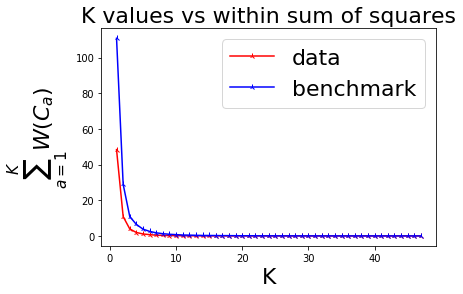

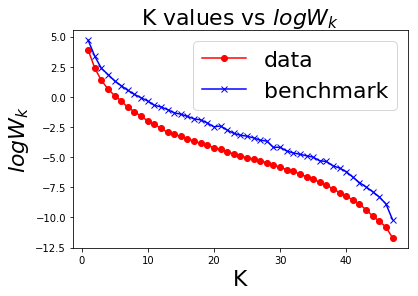

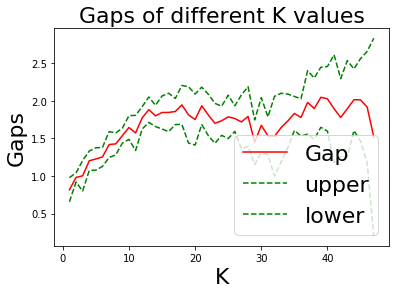

In [307]:
sumMV = gap_choose(MV)
present_K_choice(sumMV)

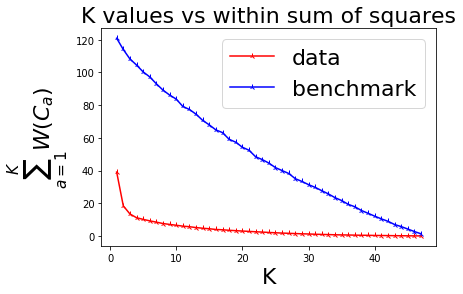

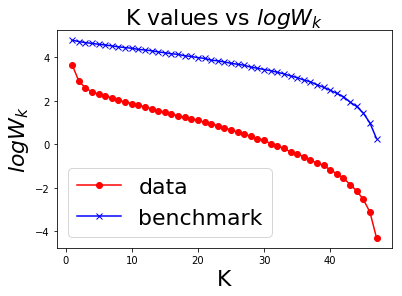

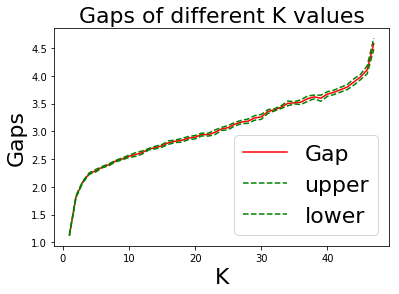

In [308]:
sumPear = gap_choose(corr)
present_K_choice(sumPear)

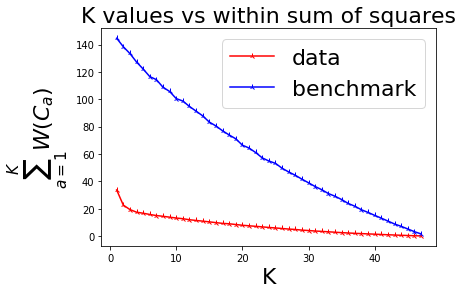

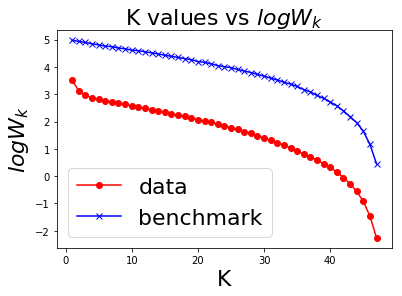

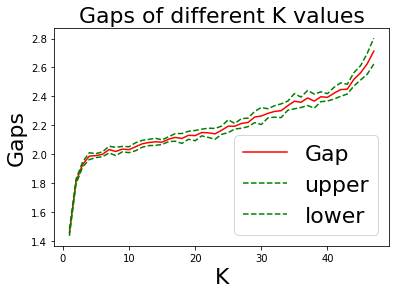

In [310]:
sumKen = gap_choose(Ken)
present_K_choice(sumKen)

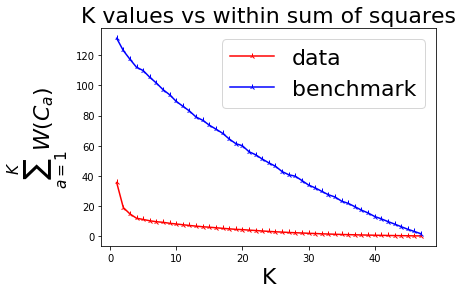

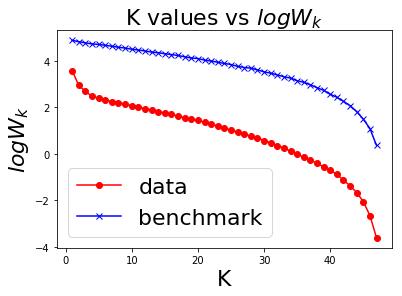

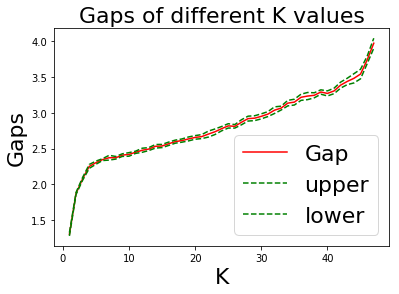

In [311]:
sumSpe = gap_choose(Spe)
present_K_choice(sumSpe)

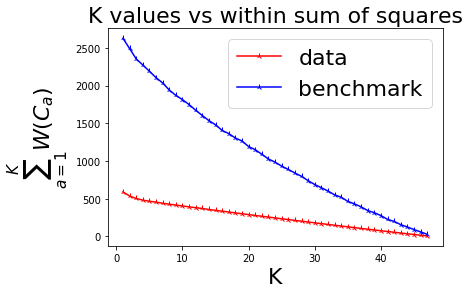

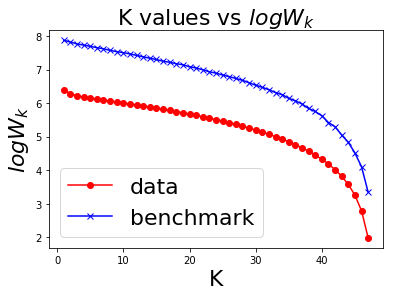

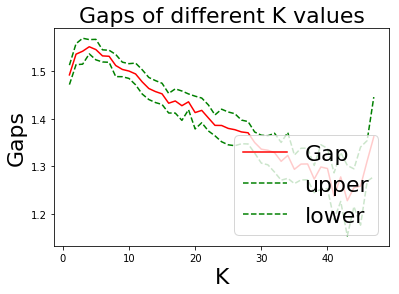

In [312]:
sumMI = gap_choose(MI)
present_K_choice(sumMI)

In [324]:
#%matplotlib tk

In [326]:
present_K_choice(sumPear)